# **Import Data**

In [66]:
# import analysis libraries
import pandas as pd
import numpy as np


In [67]:

# Load and Read Data from CSV files
test_data = pd.read_csv("test.csv")
train_data= pd.read_csv("train.csv")


In [68]:
# create df copy
train = train_data.copy()
test= test_data.copy()

In [69]:
# print shape of the data set 
print('\n', "train dataset shape is ",train.shape )
print('\n', "test dataset shape is ",test.shape )


 train dataset shape is  (1458644, 11)

 test dataset shape is  (625134, 9)


In [70]:
# Get info about train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [71]:
# Get info about test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  625134 non-null  object 
 1   vendor_id           625134 non-null  int64  
 2   pickup_datetime     625134 non-null  object 
 3   passenger_count     625134 non-null  int64  
 4   pickup_longitude    625134 non-null  float64
 5   pickup_latitude     625134 non-null  float64
 6   dropoff_longitude   625134 non-null  float64
 7   dropoff_latitude    625134 non-null  float64
 8   store_and_fwd_flag  625134 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 42.9+ MB


In [72]:
# check duplicates in train dataset
print("Number of duplicates in train dataset: ", sum(train.duplicated()))

# check duplicates in test dataset
print("Number of duplicates in test dataset: ", sum(test.duplicated()))

Number of duplicates in train dataset:  0
Number of duplicates in test dataset:  0


In [73]:
# check missing values in train dataset
print("Number of missing values in train dataset: ", train.isnull().sum().sum())

# check missing values in test dataset
print("Number of missing values in test dataset: ", test.isnull().sum().sum())

Number of missing values in train dataset:  0
Number of missing values in test dataset:  0


In [74]:
# converts pickup_datetime and dropoff_datetime" columns to datetime format
# and then creates additional features 

""" Adding additional features from the "pickup_datetime" column 
through feature engineering can provide more meaningful information 
to the machine learning model and enhance its predictive power"""


train["dropoff_datetime"] = pd.to_datetime(train["dropoff_datetime"])
train["pickup_datetime"] = pd.to_datetime(train["pickup_datetime"])
train["hour"] = train["pickup_datetime"].dt.hour
train["minute"] = train["pickup_datetime"].dt.minute
train["minute_oftheday"] = train["hour"] * 60 + train["minute"]
train["day_week"] =train["pickup_datetime"].dt.dayofweek
train["month"] = train["pickup_datetime"].dt.month

test["pickup_datetime"] = pd.to_datetime(test["pickup_datetime"])
test["hour"] = test["pickup_datetime"].dt.hour
test["minute"] = test["pickup_datetime"].dt.minute
test["minute_oftheday"] = test["hour"] * 60 + test["minute"]
test["day_week"] =test["pickup_datetime"].dt.dayofweek
test["month"] = test["pickup_datetime"].dt.month

In [75]:
# Dropping unnecessary columns
train.drop(["pickup_datetime", "dropoff_datetime"], axis=1, inplace=True)
test.drop(["pickup_datetime"], axis=1, inplace=True)



In [76]:
train= train.drop("id", axis=1)
test= test.drop("id", axis=1)

In [77]:
# convert categorical variables into numerical representations 
print(train.store_and_fwd_flag.value_counts())
train["store_and_fwd_flag"].replace({'N':0, 'Y':1}, inplace=True)
test["store_and_fwd_flag"].replace({'N':0, 'Y':1}, inplace=True)
print(train.store_and_fwd_flag.value_counts())

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64
0    1450599
1       8045
Name: store_and_fwd_flag, dtype: int64


In [78]:
#Log Transformation 
#to reduce the impact of extreme values and make the distribution of the variable more symmetric.
#filter 1: log2 to trip duration

trip_duration_fil1 = train.copy()
trip_duration_fil1['trip_duration'] = np.log2(trip_duration_fil1['trip_duration']+1)

#Filtering Outliers
#calculate mean and standard deviation
mean = trip_duration_fil1['trip_duration'].mean()
sd = trip_duration_fil1['trip_duration'].std()
lower_bound = mean - (3 * sd)
upper_bound = mean + (3 * sd)

#filter out the outliers (filter 2)
trip_duration_fil2 = trip_duration_fil1[(trip_duration_fil1['trip_duration'] > lower_bound) & 
 (trip_duration_fil1['trip_duration'] < upper_bound)]


In [79]:
train = trip_duration_fil2.reset_index(drop=True)

In [80]:
""" The code randomly samples a fraction (15%) 
of the training and test datasets using the sample() function. 
This is done to reduce the size of the datasets for faster model training."""
train= train.sample(frac = 0.15,random_state=1)
test= test.sample(frac = 0.15,random_state=1)

**Task 2**: Build a machine learning/deep leaning model to predict travel time between two locations from the given dataset, set up your experiment and evaluate your model. 

In [ ]:
""" to predict travel time between two locations we can use regression algorithm 
such as linear regression, decision trees, XGBRegressor and random forest"""

In [81]:
df=train

In [82]:
x = df.drop('trip_duration', axis = 1)
y= df.trip_duration

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,train_size=0.7,test_size=0.3)

print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)




Train (152033, 12) (152033,)
Test (65157, 12) (65157,)


In [83]:
import math
import time
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

In [84]:
#Predictive Model0
from sklearn.linear_model import LinearRegression

#initialize LinearRegression model
model_lr= LinearRegression()

#fit model 
model_lr.fit(X_train, y_train)


model_lr_pred = model_lr.predict(X_test) 
model_lr_mae= mean_absolute_error(y_test, model_lr_pred) 
model_lr_mse = mean_squared_error(y_test, model_lr_pred)
model_lr_r2 = r2_score(y_test, model_lr_pred)
start_lr = time.time()
duration_lr=(time.time() - start_lr)

df_lr = pd.DataFrame({"Model"           : ['Linear Regression'],
                       "MAE"  : [model_lr_mae],
                       "MSE" : [model_lr_mse],
                       "R2 Score"    : [model_lr_r2], 
                        "Duration"    : [duration_lr],
                      })
print(df_lr)


               Model      MAE       MSE  R2 Score  Duration
0  Linear Regression  0.81772  1.106357  0.001441  0.000075


In [85]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

#initialize LinearRegression model
model_dt = DecisionTreeRegressor(max_depth=8)

#fit model 
model_dt.fit(X_train, y_train)

model_dt_pred = model_dt.predict(X_test)
model_dt_mae= mean_absolute_error(y_test, model_dt_pred)
model_dt_mse = mean_squared_error(y_test, model_dt_pred)
model_dt_r2 = r2_score(y_test, model_dt_pred)
print(model_dt_pred)

start_dt = time.time()
duration_dt=(time.time() - start_dt)

df_dt = pd.DataFrame({"Model"           : ['Decision Tree'],
                       "MAE"  : [model_dt_mae],
                       "MSE" : [model_dt_mse],
                       "R2 Score"    : [model_dt_r2], 
                        "Duration"    : [duration_dt],
                      })
print(df_dt)


[9.06852541 9.06852541 8.82256336 ... 9.06852541 9.02924943 9.92565765]
           Model       MAE       MSE  R2 Score  Duration
0  Decision Tree  0.648025  0.694221   0.37342  0.000064


In [86]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
model_rf=RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)
#fit model 
model_rf.fit(X_train, y_train)

model_rf_pred = model_rf.predict(X_test)
model_rf_mae= mean_absolute_error(y_test, model_rf_pred)
model_rf_mse = mean_squared_error(y_test, model_rf_pred)
model_rf_r2 = r2_score(y_test, model_rf_pred)
print(model_rf_pred)

start_rf = time.time()
duration_rf=(time.time() - start_rf)

df_rf = pd.DataFrame({"Model"           : ['Random Forest '],
                       "MAE"  : [model_rf_mae],
                       "MSE" : [model_rf_mse],
                       "R2 Score"    : [model_rf_r2], 
                        "Duration"    : [duration_rf],
                      })
print(df_rf)


[10.5776728   8.48184414  8.4308283  ...  8.43971241  8.68711703
  9.33803573]
            Model      MAE       MSE  R2 Score  Duration
0  Random Forest   0.45344  0.368959  0.666991  0.000061


In [87]:
#XGB Regressor
from xgboost import XGBRegressor
modelxg= XGBRegressor(n_estimators=200,max_depth=20,learning_rate=0.1)

#fit model 
modelxg.fit(X_train, y_train)

model_xg_pred = modelxg.predict(X_test)
model_xg_mae= mean_absolute_error(y_test, model_xg_pred)
model_xg_mse = mean_squared_error(y_test, model_xg_pred)
model_xg_r2 = r2_score(y_test, model_xg_pred)
print(model_xg_pred)

start_xg = time.time()
duration_xg=(time.time() - start_xg)

df_xg = pd.DataFrame({"Model"           : [' XGB Regressor'],
                       "MAE"  : [model_xg_mae],
                       "MSE" : [model_xg_mse],
                       "R2 Score"    : [model_xg_r2], 
                        "Duration"    : [duration_xg],
                      })
print(df_xg)


[10.788137   7.883101   8.17302   ...  7.8537803  7.8930078  9.159194 ]
            Model       MAE       MSE  R2 Score  Duration
0   XGB Regressor  0.362555  0.244857     0.779  0.000053


In [88]:
#concat all models
model_performances = pd.concat([df_lr,df_dt,df_rf,df_xg],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)

model_performances

,Model,MAE,MSE,R2 Score,Duration
0,Linear Regression,0.817720,1.106357,0.001441,0.000075
1,Decision Tree,0.648025,0.694221,0.373420,0.000064
2,Random Forest,0.453440,0.368959,0.666991,0.000061
3,XGB Regressor,0.362555,0.244857,0.779000,0.000053


In [89]:
import matplotlib.pyplot as plt

In [90]:
# Define the evaluation metrics for each algorithm

mse_scores = [model_lr_mse,model_dt_mse,model_rf_mse,model_xg_mse]
mae_scores = [model_lr_mae,model_dt_mae,model_rf_mae,model_xg_mae]
r2_scores = [model_lr_r2, model_dt_r2, model_rf_r2, model_xg_r2]

# Define the names of the algorithms
algorithms = ['LinearRegression','DecisionTree','RandomForest','xgboost']


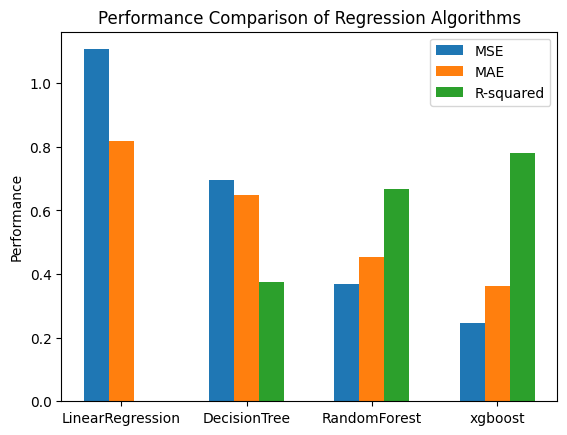

In [91]:
# Set the positions of the bars on the x-axis
x = np.arange(len(algorithms))

# Set the width of the bars
width = 0.2

# Create the figure and axes
fig, ax = plt.subplots()

# Plot the mean squared error
ax.bar(x - width, mse_scores, width, label='MSE')

# Plot the mean absolute error
ax.bar(x, mae_scores, width, label='MAE')

# Plot the R-squared score
ax.bar(x + width, r2_scores, width, label='R-squared')

# Set the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(algorithms)

# Set the y-axis label
ax.set_ylabel('Performance')

# Set the chart title
ax.set_title('Performance Comparison of Regression Algorithms')

# Add a legend
ax.legend()

# Show the plot
plt.show()


# Task 3

 Build an optimization model to construct the optimal traveling route (e.g., genetic algorithms), given a set of locations a taxi driver wants to visit and his starting location.
 

In [92]:
!pip install deap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [93]:
from math import radians, sin, cos, sqrt, atan2
import random
from deap import base, creator, tools, algorithms

In [94]:
# Assuming the set of locations is represented as a list of coordinates [(x1, y1), (x2, y2), ...]
locations = [(40.7128, -74.0060), (40.7397, -74.0028), (40.7489, -73.9680), (40.7589, -73.9851),
 (40.747379,-73.970184), (40.763725, -73.953156)]
# Define the starting location
starting_location = (40.7128, -74.0060)  

In [95]:

# Calculate the distance between two coordinates using the Haversine formula
def calculate_distance(coord1, coord2):
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    earth_radius = 6371.0  # Radius of the Earth in kilometers

    lat1_rad = radians(lat1)
    lon1_rad = radians(lon1)
    lat2_rad = radians(lat2)
    lon2_rad = radians(lon2)

    delta_lat = lat2_rad - lat1_rad
    delta_lon = lon2_rad - lon1_rad

    a = sin(delta_lat / 2) ** 2 + cos(lat1_rad) * cos(lat2_rad) * sin(delta_lon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = earth_radius * c
    return distance

In [ ]:
# Create the fitness function
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

In [97]:

# register the necessary functions for the genetic algorithm.
toolbox.register("indices", random.sample, range(len(locations)), len(locations))
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evaluate_fitness(individual):
    route = [starting_location] + [locations[i] for i in individual] + [starting_location]
    total_distance = 0
    for i in range(len(route) - 1):
        total_distance += calculate_distance(route[i], route[i+1])
    return total_distance,

toolbox.register("evaluate",evaluate_fitness)
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

In [98]:
# Set the parameters
population_size = 100
crossover_probability = 0.8
mutation_probability = 0.2
number_of_generations = 100

population = toolbox.population(n=population_size)

In [99]:
# Run the genetic algorithm
for generation in range(number_of_generations):
    offspring = algorithms.varAnd(population, toolbox, cxpb=crossover_probability, mutpb=mutation_probability)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))

In [100]:
# Get the best individual
best_individual = tools.selBest(population, k=1)[0]
best_route = [starting_location] + [locations[i] for i in best_individual] + [starting_location]

In [102]:
for tupleObj in best_route:
  print(*tupleObj)

40.7128 -74.006
40.747379 -73.970184
40.7489 -73.968
40.763725 -73.953156
40.7589 -73.9851
40.7397 -74.0028
40.7128 -74.006
40.7128 -74.006


In [101]:
# Print the best route 
print("Best Route:", best_route)

Best Route: [(40.7128, -74.006), (40.747379, -73.970184), (40.7489, -73.968), (40.763725, -73.953156), (40.7589, -73.9851), (40.7397, -74.0028), (40.7128, -74.006), (40.7128, -74.006)]
